# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

This data, taken from the College Board, gives the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There is a row with All that could conflict with our data, depending on what we are wanting to query.  The row of labels will also conflict and will need to be removed.  We will potentially have to account for repeated values within the dataset, depending on what statistics we are looking for.

##### 3. Create a data dictionary for the dataset.

In [11]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import scipy
reader = csv.reader(open('../assets/sat_scores.csv'))

result = {}
for row in reader:
    key = row[0]
    if key in result:
        pass
    result[key] = row[1:]
print result

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'State': ['Rate', 'Verbal', 'Math'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NB': ['8', '562', '568'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543'

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [19]:
import csv

data= []
with open('../assets/sat_scores.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
f.close()

##### 5. Print the data

In [20]:
[row for row in data]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [21]:
labels = data[0]
data = data[1:]

# Removing last row
data = data[:-1]

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [22]:
state_names = [row[labels.index('State')] for row in data]
state_names

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NB',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

##### 8. Print the types of each column

In [23]:
[type(item) for item in data[0]]

[str, str, str, str]

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [24]:
rate = labels.index('Rate')
math = labels.index('Math')
verbal = labels.index('Verbal')

for row in data:
    row[rate] = int(row[rate])
    row[math] = int(row[math])
    row[verbal] = int(row[verbal])
[type(item) for item in data[0]]

[str, int, int, int]

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [25]:
state_rate = {}
state_math = {}
state_verbal = {}

for row in data:
    state_rate[row[0]] = row[rate]
    state_math[row[0]] = row[math]
    state_verbal[row[0]] = row[verbal]

##### 11. Create a dictionary with the values for each of the numeric columns

In [28]:
data_dict = {'rate': [row[labels.index('Rate')] for row in data],
             'math': [row[labels.index('Math')] for row in data],
             'verbal': [row[labels.index('Verbal')] for row in data]
            }

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [29]:
print 'Rate:'
print ' - min:', min(data_dict['rate'])
print ' - max:', max(data_dict['rate'])

print 'Math:'
print ' - min:', min(data_dict['math'])
print ' - max:', max(data_dict['math'])

print 'Verbal:'
print ' - min:', min(data_dict['verbal'])
print ' - max:', max(data_dict['verbal'])

Rate:
 - min: 4
 - max: 82
Math:
 - min: 439
 - max: 603
Verbal:
 - min: 482
 - max: 593


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [30]:
from __future__ import division

# ddof=0 for the stdev of a population
# ddof=1 is used for an unbias estimator of stdev for a sample
# Numpy uses ddof=0 as default
def standard_deviation(values, ddof=1):
    mean = sum(values) / len(values)
    variances = [x - mean for x in values]
    squares = [y ** 2 for y in variances]
    variance_figure = sum(squares) / (len(values) - ddof)
    sd = variance_figure ** 0.5
    return sd
    
print 'Rate:'
print standard_deviation(data_dict['rate'])

print 'Math:'
print standard_deviation(data_dict['math'])

print 'Verbal:'
print standard_deviation(data_dict['verbal'])

Rate:
27.5506805724
Math:
36.2873931547
Verbal:
33.3606672242


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

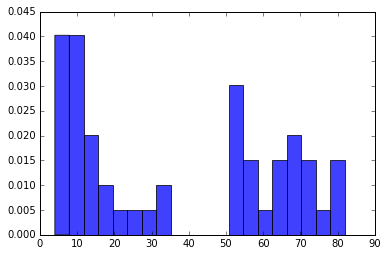

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

n, bins, patches = plt.hist(data_dict['rate'], 20, normed=1, facecolor='blue', alpha=0.75)

##### 15. Plot the Math distribution

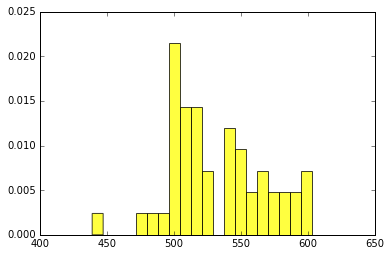

In [33]:
n, bins, patches = plt.hist(data_dict['math'], 20, normed=1, facecolor='yellow', alpha=0.75)

##### 16. Plot the Verbal distribution

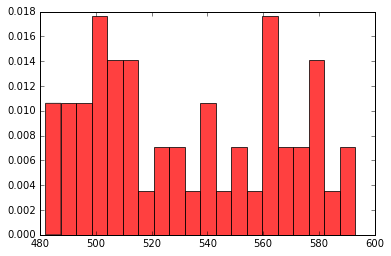

In [34]:
n, bins, patches = plt.hist(data_dict['verbal'], 20, normed=1, facecolor='red', alpha=0.75)

##### 17. What is the typical assumption for data distribution?

The typical assumption of data distribution is that sampling the distribution of the mean will be normal.  
Or, in other words, that calculating the mean by one random sample, and then doing so an infinite amount of times, will always result in a perfect bell curve.

##### 18. Does that distribution hold true for our data?

In [91]:
print scipy.stats.mstats.normaltest(rate, axis = 0)
print scipy.stats.mstats.normaltest(verbal, axis = 0)
print scipy.stats.mstats.normaltest(math, axis = 0)

NormaltestResult(statistic=81.808181893074121, pvalue=1.720200282492163e-18)
NormaltestResult(statistic=21.872280910358018, pvalue=1.7803055551900955e-05)
NormaltestResult(statistic=0.53233528608047165, pvalue=0.76631065008500243)


##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

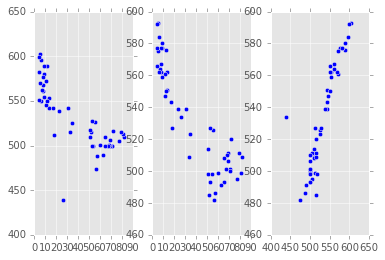

In [36]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.scatter(data_dict['rate'], data_dict['math'])
ax2 = fig.add_subplot(132)
ax2.scatter(data_dict['rate'], data_dict['verbal'])
ax3 = fig.add_subplot(133)
ax3.scatter(data_dict['math'], data_dict['verbal'])

##### 20. Are there any interesting relationships to note?

One of the most notable relationships from the data I pulled is that as scores increase in one subject,
they also increase in the other subject.  So if a student has a high math score, they will also have a high verbal score
and vice versa.  Another interesting observation comes from the Math and Verbal scores by rate, which indicates that
the lower the rate of participation by a state, the higher the scores in both categories tended to be.

##### 21. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x11059d610>],
 'caps': [<matplotlib.lines.Line2D at 0x1105aa550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1105b5850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1105b5210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11059d810>,
  <matplotlib.lines.Line2D at 0x11059ded0>]}

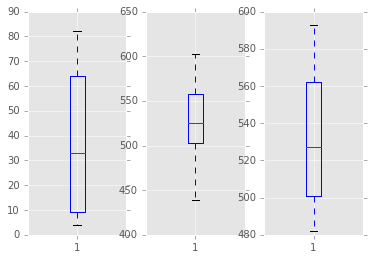

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.boxplot(data_dict['rate'])
ax2 = fig.add_subplot(132)
ax2.boxplot(data_dict['math'])
ax3 = fig.add_subplot(133)
ax3.boxplot(data_dict['verbal'])

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

I created a tableau document titled Bonus_Heat_Map.twb and placed it in the Solutions folder.